In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df_energy = pd.read_csv('Энергопотребление_2016_2020.csv')
df_energy.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [3]:
df_weather = pd.read_csv('Погода_2016_2020.csv')
df_weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [4]:
# замена колонки 'StartDate' двумя колонками 'Time' и 'Date'
df_energy.StartDate = pd.to_datetime(df_energy.StartDate)
df_energy['Time'] = df_energy.StartDate.dt.time
df_energy['Date'] = df_energy.StartDate.dt.date
df_energy.drop('StartDate', axis=1, inplace=True)

In [5]:
df_energy.head()

,Value (kWh),day_of_week,notes,Time,Date
0,1.057,2,weekday,00:00:00,2016-01-06
1,1.171,2,weekday,01:00:00,2016-01-06
2,0.560,2,weekday,02:00:00,2016-01-06
3,0.828,2,weekday,03:00:00,2016-01-06
4,0.932,2,weekday,04:00:00,2016-01-06


In [6]:
df_weather.Date = pd.to_datetime(df_weather.Date).dt.date 

In [7]:
df = df_energy.merge(df_weather.drop('day_of_week', axis=1), how='left', on='Date') 

In [14]:
df.isna().sum()

Value (kWh)       0
day_of_week       0
Time              0
Date              0
Day               0
Temp_max          0
Temp_avg          0
Temp_min          0
Dew_max           0
Dew_avg           0
Dew_min           0
Hum_max           0
Hum_avg           0
Hum_min           0
Wind_max          0
Wind_avg          0
Wind_min          0
Press_max         0
Press_avg         0
Press_min         0
Precipit          0
COVID_lockdown    0
vacation          0
weekday           0
weekend           0
month             0
year              0
dtype: int64

In [9]:
# получение dummies из столбца 'notes'
dummies = pd.get_dummies(df.notes)
df = pd.concat([df, dummies], axis=1)
df.drop('notes', axis=1, inplace=True)

In [11]:
df['month'] = pd.to_datetime(df.Date).dt.month
df['year'] = pd.to_datetime(df.Date).dt.year

In [12]:
df.head()

,Value (kWh),day_of_week,Time,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Press_max,Press_avg,Press_min,Precipit,COVID_lockdown,vacation,weekday,weekend,month,year
0,1.057,2,00:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.8,29.8,29.7,0.0,False,False,True,False,1,2016
1,1.171,2,01:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.8,29.8,29.7,0.0,False,False,True,False,1,2016
2,0.560,2,02:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.8,29.8,29.7,0.0,False,False,True,False,1,2016
3,0.828,2,03:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.8,29.8,29.7,0.0,False,False,True,False,1,2016
4,0.932,2,04:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.8,29.8,29.7,0.0,False,False,True,False,1,2016


In [15]:
# функция определяет время суток
def time_of_day(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'ночь'
    elif 6 <= hour < 12:
        return 'утро'
    elif 12 <= hour < 18:
        return 'день'
    else:
        return 'вечер'

In [16]:
df['Time_of_day'] = df['Time'].apply(time_of_day)

In [17]:
df['season'] = pd.cut(df.month, bins=[0, 3, 6, 9, 12], labels=['зима', 'весна', 'лето', 'осень']) # создание столбца с временами года

In [18]:
df.head()

,Value (kWh),day_of_week,Time,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Press_min,Precipit,COVID_lockdown,vacation,weekday,weekend,month,year,Time_of_day,season
0,1.057,2,00:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.7,0.0,False,False,True,False,1,2016,ночь,зима
1,1.171,2,01:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.7,0.0,False,False,True,False,1,2016,ночь,зима
2,0.560,2,02:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.7,0.0,False,False,True,False,1,2016,ночь,зима
3,0.828,2,03:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.7,0.0,False,False,True,False,1,2016,ночь,зима
4,0.932,2,04:00:00,2016-01-06,1,85,74.8,68,74,71.4,...,29.7,0.0,False,False,True,False,1,2016,ночь,зима


<Axes: >

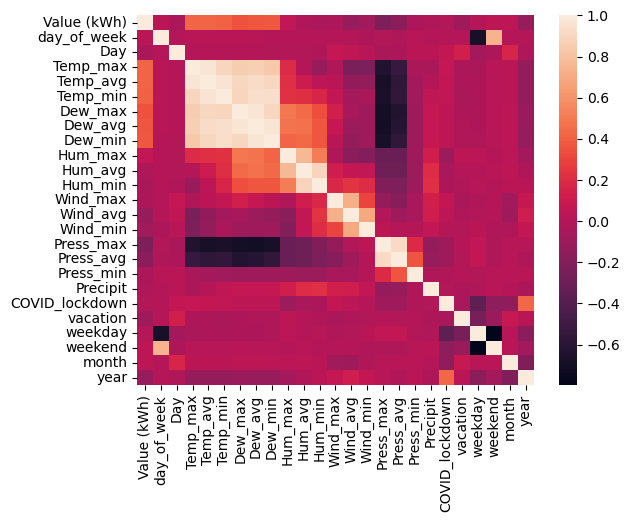

In [22]:
corr = df.select_dtypes(include=['float', 'int', 'bool']).corr()
sns.heatmap(corr)

In [76]:
corr['Value (kWh)']

Value (kWh)       1.000000
day_of_week       0.026342
Day              -0.034022
Temp_max          0.411861
Temp_avg          0.417369
Temp_min          0.408709
Dew_max           0.351552
Dew_avg           0.367533
Dew_min           0.373874
Hum_max           0.058227
Hum_avg          -0.012892
Hum_min          -0.043594
Wind_max         -0.028582
Wind_avg         -0.121607
Wind_min         -0.079303
Press_max        -0.223549
Press_avg        -0.168737
Press_min        -0.025829
Precipit         -0.017351
COVID_lockdown   -0.008105
vacation         -0.090438
weekday           0.001744
weekend           0.038828
month             0.043852
year             -0.122346
Name: Value (kWh), dtype: float64

Наибольшая корреляция наблюдается с температурой (Attr_max = Temp_avg). Посмотрим на график среднего энерогопотребления для каждого среднего знаяения температуры.

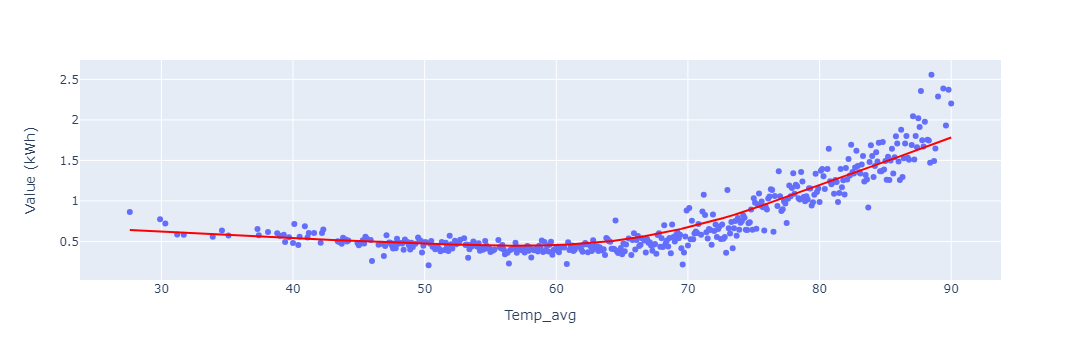

In [28]:
px.scatter(df.groupby('Temp_avg')['Value (kWh)'].mean().reset_index(), x='Temp_avg', y='Value (kWh)', trendline='lowess', trendline_color_override='red')


На графике можно заметить увеличение среднего энергопотребления с ростом температуры, в то же время наименьшая средняя температура на графике 27,6 фаренгейт, что примерно (-2,5) градусов цельсия. Можно сделать вывод, что измерения проводились в теплом климате, это показывает, что при высокой температуре растет энергопотребление. Можно предположить, что в таком случае люди включают дома кондиционеры. В то же время при низких температурах роста энергопротребления не налюдается по нескольким предпологаемым причинам: 
1) люди живут в теплом климате и не используют дома обогреватели,
2) холода бывают не часто (на графике в этой области меньше точек)
3) центральное отопление     

В пользу гипотезы о том, что большую часть энергии потребляет кондиционер так же может служить обратная корреляция энергопотребления с ветром. Это объсянияется тем, при наличии ветра люди могут чувствовать себя более комфортно и реже пользоваться кондиционером.
Это наблюдение находит подтверждение и на дашборде, где приведна зависимость энергопотребления от времени года, и летом (когда ср. температура наибольшая) энегргопотребление так же наибольшее. Обратная картина справедлива для зимы - наименьшая температура и наименьшее энергопотребление

Что касается кореляции энергопотребления с точкой росы, в данном случае, эта зависимость косвенная: точка росы напрямую зависит от тепературы. Это же верно и для атмосферного давления. Также есть небольшая отрицательная кореляция с годом, что может говорить о снижении энергопотребления с течением времемни

In [31]:
df[['Value (kWh)', 'Temp_avg', 'season', 'year', 'Time_of_day']].to_csv('new_df.csv', index=False) #сохранение таблицы для дашборда